In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset/heart_attack_risk_dataset.csv


In [2]:
import pandas as pd
import numpy as np

Load the Dataset

In [3]:
f=pd.read_csv('/kaggle/input/heart-attack-dataset/heart_attack_risk_dataset.csv')
f

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


CHeck the number of rows and columns

In [4]:
f.shape

(50000, 20)

Check data types and null values

In [5]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

Get summary statistics

In [6]:
f.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


Get the size

In [7]:
f.size

1000000

View the first few rows

In [8]:
f.head(10)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
5,41,Male,0,1,Moderate,36.11,0,0,271.2,141,119,0,Low,Atypical,Fixed defect,0,Normal,0,101,High
6,20,Male,1,0,Low,15.12,0,0,164.8,154,67,0,Low,Non-anginal,Normal,0,Normal,0,176,Low
7,39,Female,0,0,Moderate,20.78,0,0,297.0,91,112,0,Low,Atypical,Normal,0,ST-T abnormality,1,134,Moderate
8,70,Male,0,1,High,29.20,0,0,280.7,121,71,0,Moderate,Non-anginal,Fixed defect,0,ST-T abnormality,0,168,Moderate
9,19,Female,0,0,High,35.54,0,1,275.0,167,76,0,Low,Typical,Reversible defect,1,Left Ventricular Hypertrophy,0,102,Moderate


View the first few rows

In [9]:
f.tail(10)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
49990,45,Female,0,1,Moderate,18.21,0,1,253.3,171,126,0,Low,Atypical,Normal,0,Normal,0,117,Low
49991,66,Male,0,0,Low,32.21,0,0,168.2,144,72,1,Moderate,Non-anginal,Reversible defect,0,ST-T abnormality,0,173,High
49992,62,Female,0,0,Moderate,23.53,0,0,181.8,94,93,1,Moderate,Non-anginal,Fixed defect,0,ST-T abnormality,1,104,Low
49993,77,Female,0,1,Moderate,36.89,0,0,196.7,154,107,0,Moderate,Typical,Reversible defect,0,Normal,0,101,Low
49994,73,Male,0,0,Moderate,35.78,0,1,171.7,136,100,1,Moderate,Non-anginal,Reversible defect,0,Left Ventricular Hypertrophy,0,101,Low
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate
49999,72,Male,0,0,High,30.85,0,0,191.8,142,70,0,High,Asymptomatic,Normal,0,ST-T abnormality,0,144,Moderate


Check for Missing Values:

In [10]:
missing_values=f.isnull().sum()
print(missing_values)

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64


Visualize Missing Data

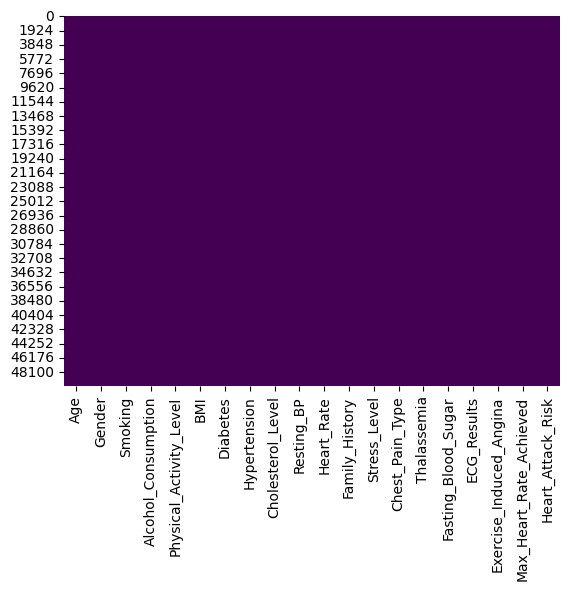

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(f.isnull(), cbar=False, cmap='viridis')
plt.show()

Check for Duplicates

In [12]:
duplicates=f.duplicated().sum()
print(f'The number of duplicates rows: {duplicates}')

The number of duplicates rows: 0


Remove Duplicates

In [13]:
data=f.drop_duplicates()

 ***Understand Distributions and Relationships****

Univariate Analysis:

Plot distributions for numerical data.

<Axes: >

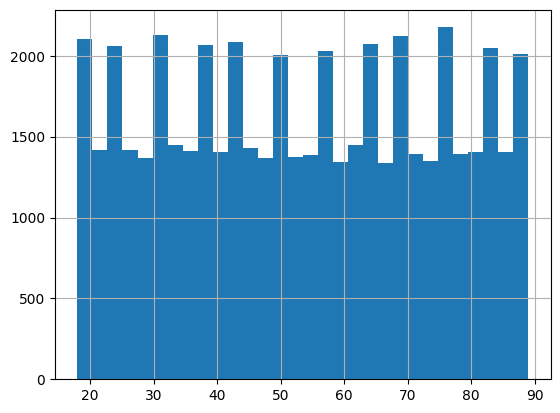

In [14]:
data['Age'].hist(bins=30)

Count unique values for categorical data

In [15]:
data['Physical_Activity_Level'].value_counts()

Physical_Activity_Level
Low         20061
Moderate    19994
High         9945
Name: count, dtype: int64

Bivariate/Multivariate Analysis:

Explore relationships between variables using scatter plots, heatmaps, etc.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


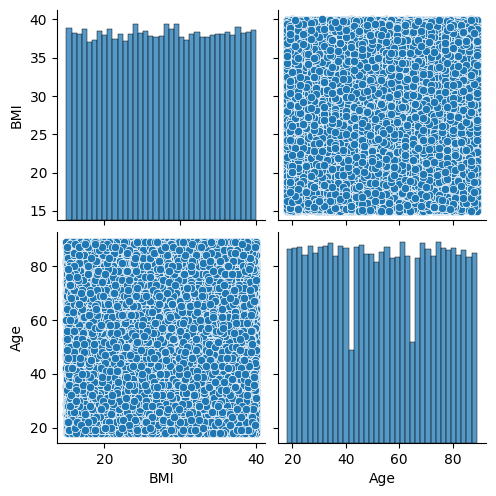

In [16]:

sns.pairplot(data[['BMI', 'Age',]])
plt.show()



Save cleaned dataset to a new file

In [17]:
data.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.
